# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [194]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [195]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [196]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [259]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
    plt.plot(data.power / data.power.max(), data.eta / data.eta.max())
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Двухвальная установка без регенератора

### Загрузка данных

In [281]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

In [282]:
data_2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
14,0.278063,0.999999,0.986420,41.575544,14.993397,2.559114,5.286335,7.784501,2359.526472,9607.966443,1310
13,0.294842,1.000000,0.990990,43.511512,15.753731,2.675578,5.312635,8.733967,2451.800355,9674.096993,1320
12,0.307660,1.000000,0.993916,45.058508,16.378166,2.773097,5.328985,9.547285,2525.658123,9724.754486,1330
11,0.318086,1.000000,0.995910,46.375081,16.922808,2.859559,5.339709,10.279682,2588.656856,9766.302751,1340
10,0.326824,1.000000,0.997299,47.532420,17.412716,2.938444,5.346793,10.955286,2644.168781,9801.591498,1350
9,0.334287,1.000000,0.998269,48.571689,17.862318,3.011740,5.351366,11.587991,2694.122322,9832.246818,1360
8,0.340743,1.000000,0.998938,49.519361,18.280863,3.080709,5.354146,12.186674,2739.741971,9859.299934,1370
7,0.346360,1.000000,0.999388,50.392349,18.674220,3.146132,5.355620,12.756785,2781.815625,9883.413125,1380
6,0.351277,1.000000,0.999678,51.204282,19.047127,3.208642,5.356146,13.302882,2820.957261,9905.100873,1390
5,0.355591,1.000000,0.999853,51.964493,19.402800,3.268653,5.355990,13.827910,2857.591275,9924.719081,1400


### Построим общие характеристики установки

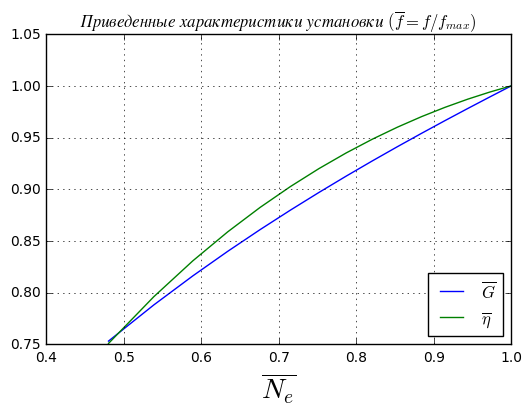

In [283]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

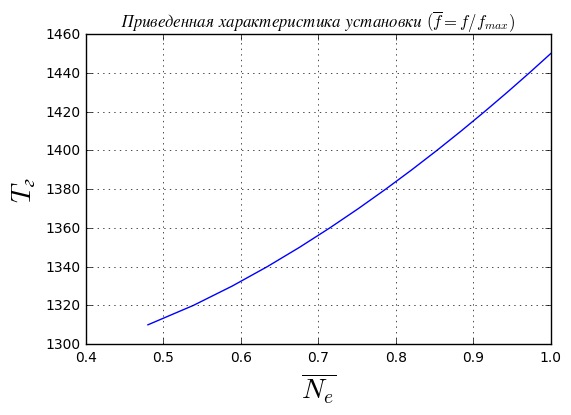

In [284]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [285]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

In [286]:
data_2nr

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,sigma,t
14,0.428805,0.999999,0.990536,54.133503,3.041490,1.681660,1.599258,6.966378,2273.789560,9152.605224,0.957873,1170
13,0.439477,1.000000,0.992493,54.986320,3.116510,1.719582,1.602567,7.563074,2336.939050,9231.142340,0.957843,1190
12,0.449466,1.000000,0.994151,55.808025,3.190381,1.757294,1.605345,8.172275,2398.072173,9306.004891,0.957829,1210
11,0.458806,1.000000,0.995537,56.599254,3.263089,1.794781,1.607636,8.792393,2457.255405,9377.411489,0.957838,1230
10,0.467558,1.000000,0.996679,57.361092,3.334648,1.832029,1.609489,9.421937,2514.556079,9445.597692,0.957861,1250
9,0.475728,1.000000,0.997601,58.094794,3.405087,1.869030,1.610950,10.059519,2570.042642,9510.793054,0.957896,1270
8,0.483388,1.000000,0.998330,58.801839,3.474446,1.905778,1.612069,10.703834,2623.781775,9573.228150,0.957947,1290
7,0.490552,1.000000,0.998891,59.484090,3.542797,1.942280,1.612890,11.353839,2675.852525,9633.149654,0.958008,1310
6,0.497242,1.000000,0.999307,60.143035,3.610193,1.978538,1.613452,12.008492,2726.323670,9690.758615,0.958084,1330
5,0.503502,1.000000,0.999602,60.780880,3.676730,2.014574,1.613797,12.667092,2775.280636,9746.303627,0.958167,1350


### Построим общие характеристики установки

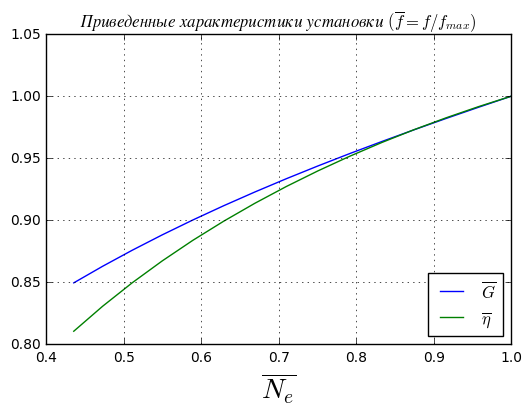

In [287]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

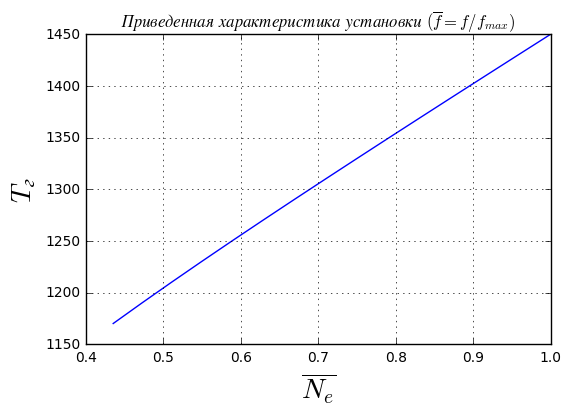

In [288]:
plot_characteristic(data_2nr.power, data_2nr.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

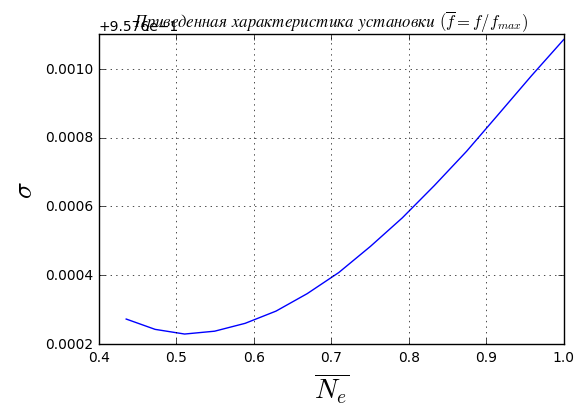

In [289]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

### Построим зависимость коэффициента восстановления от температуры в камере сгорания

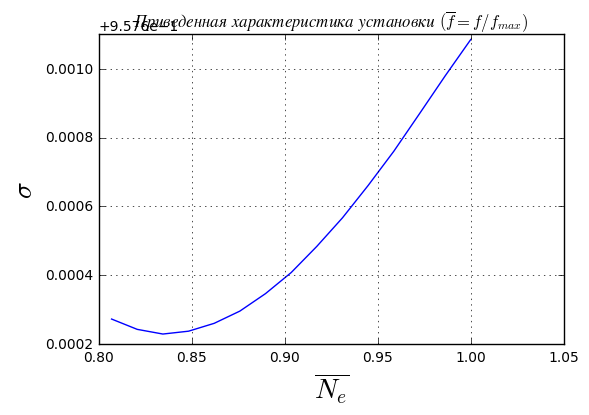

In [290]:
plot_characteristic(data_2nr.t, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [243]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

In [244]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
14,0.278394,0.995551,1.0,1.0,49.926814,2.570577,1.221609,12.130546,9.898691,2551.618224,5910.436773,5766.724640,1310
13,0.283426,0.996522,1.0,1.0,50.638004,2.615348,1.222518,12.343237,10.345318,2589.585801,5914.947221,5786.563783,1320
12,0.288240,0.997342,1.0,1.0,51.338956,2.660215,1.223406,12.554549,10.795512,2626.774975,5919.452212,5805.830026,1330
11,0.292851,0.998024,1.0,1.0,52.031745,2.705262,1.224315,12.764540,11.249513,2663.254002,5924.647574,5824.601936,1340
10,0.297243,0.998579,1.0,1.0,52.714854,2.750390,1.225215,12.973119,11.705945,2698.960556,5930.081084,5842.843872,1350
9,0.301413,0.999019,1.0,1.0,53.388054,2.795561,1.226099,13.180273,12.163976,2733.879722,5935.693157,5860.559697,1360
8,0.305367,0.999358,1.0,1.0,54.052296,2.840791,1.226966,13.386224,12.623313,2768.037346,5941.546461,5877.785283,1370
7,0.309098,0.999608,1.0,1.0,54.707609,2.886049,1.227817,13.590954,13.083243,2801.427451,5947.665404,5894.530117,1380
6,0.312612,0.999783,1.0,1.0,55.354675,2.931337,1.228652,13.794619,13.543371,2834.066456,5954.085861,5910.819919,1390
5,0.315910,0.999897,1.0,1.0,55.994087,2.976645,1.229471,13.997348,14.003231,2865.964517,5960.837458,5926.676644,1400


### Построим общие характеристики установки

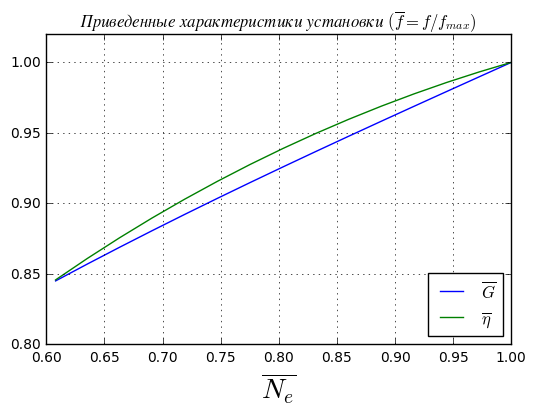

In [245]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

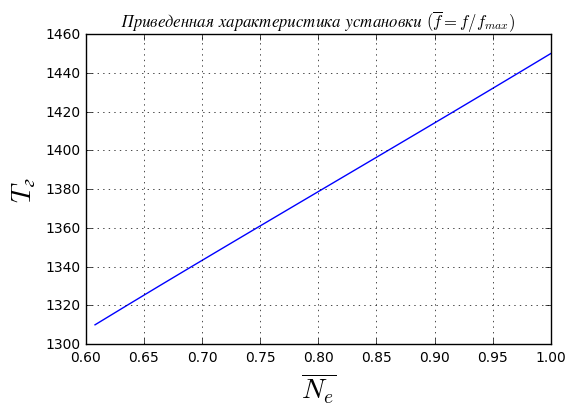

In [246]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

## Трехвальная установка с пром. охлаждением

### Загрузка данных

In [247]:
data_3nс = pd.read_json(data_root + '3nc.json').sort_values('t')

In [248]:
data_3nс

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,0.291716,0.980414,1.0,0.999993,31.381691,3.290958,5.949227,2.557104,7.279485,2320.149019,5706.640235,5208.858003,1290
15,0.301005,0.984172,1.0,0.999996,32.290373,3.386118,6.022146,2.609890,7.825107,2376.891942,5725.909222,5264.728161,1300
14,0.309847,0.987421,1.0,0.999998,33.181848,3.481447,6.095339,2.660469,8.379367,2431.906171,5745.055701,5318.863123,1310
13,0.318229,0.990195,1.0,0.999999,34.055512,3.576882,6.168803,2.708849,8.940401,2485.187856,5764.081716,5371.605632,1320
12,0.326142,0.992528,1.0,1.000000,34.910822,3.672347,6.242536,2.755040,9.506283,2536.730618,5782.990311,5423.242544,1330
11,0.333579,0.994457,1.0,1.000000,35.747070,3.767729,6.316520,2.799044,10.074938,2586.517926,5801.779242,5473.995123,1340
10,0.340531,0.996018,1.0,1.000000,36.563655,3.862905,6.390749,2.840871,10.644307,2634.538107,5820.448813,5524.036720,1350
9,0.346996,0.997251,1.0,1.000000,37.360117,3.957742,6.465205,2.880542,11.212372,2680.784375,5838.996723,5573.500894,1360
8,0.352968,0.998194,1.0,1.000000,38.135819,4.052072,6.539853,2.918075,11.777028,2725.243800,5857.412637,5622.461622,1370
7,0.358446,0.998889,1.0,1.000000,38.890706,4.145765,6.614679,2.953521,12.336529,2767.931073,5875.694851,5670.984812,1380


### Построим общие характеристики установки

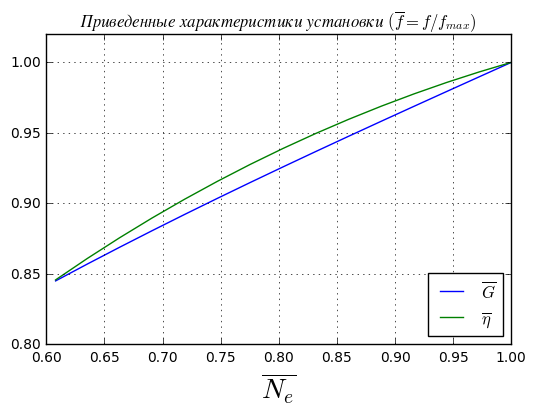

In [249]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

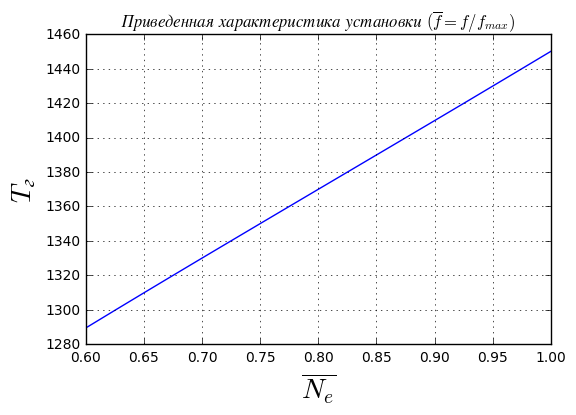

In [189]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

## Трехвальная установка с пром. подогревом

### Загрузка данных

In [190]:
data_3nb = pd.read_json(data_root + '3nb.json').sort_values('t')

In [191]:
data_3nb

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,0.255222,0.997643,0.999879,1.0,40.630464,2.565896,2.073784,3.803959,11.200104,2678.656440,5471.434056,5636.919723,1290
15,0.259555,0.998170,0.999902,1.0,41.210366,2.601508,2.099926,3.825654,11.549534,2706.412619,5507.405390,5656.419107,1300
14,0.263768,0.998612,0.999921,1.0,41.787092,2.637146,2.126347,3.846410,11.898097,2733.556145,5543.141512,5677.022597,1310
13,0.267842,0.998975,0.999938,1.0,42.358813,2.672685,2.153029,3.866115,12.244402,2760.013075,5578.636538,5698.654442,1320
12,0.271761,0.999268,0.999952,1.0,42.923691,2.707999,2.179956,3.884659,12.586765,2785.692845,5613.891678,5721.215692,1330
11,0.275518,0.999496,0.999964,1.0,43.479729,2.742944,2.207102,3.901928,12.923738,2810.528043,5648.901948,5744.578915,1340
10,0.279102,0.999669,0.999974,1.0,44.025072,2.777386,2.234448,3.917828,13.253880,2834.455661,5683.669367,5768.601395,1350
9,0.282506,0.999795,0.999981,1.0,44.557791,2.811182,2.261965,3.932269,13.575873,2857.424568,5718.186981,5793.116691,1360
8,0.285721,0.999883,0.999987,1.0,45.076253,2.844208,2.289627,3.945186,13.888257,2879.375962,5752.456383,5817.954932,1370
7,0.288745,0.999939,0.999992,1.0,45.579008,2.876351,2.317410,3.956534,14.190056,2900.286195,5786.477317,5842.942194,1380


### Построим общие характеристики установки

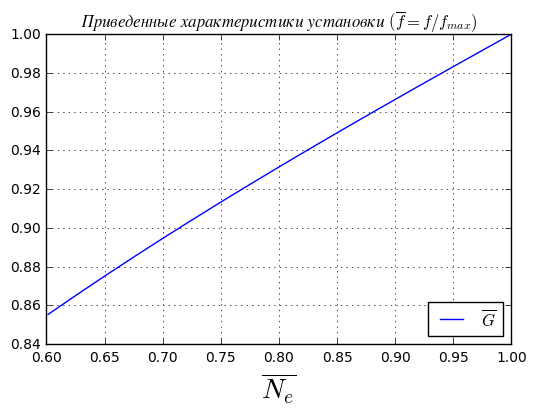

In [192]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

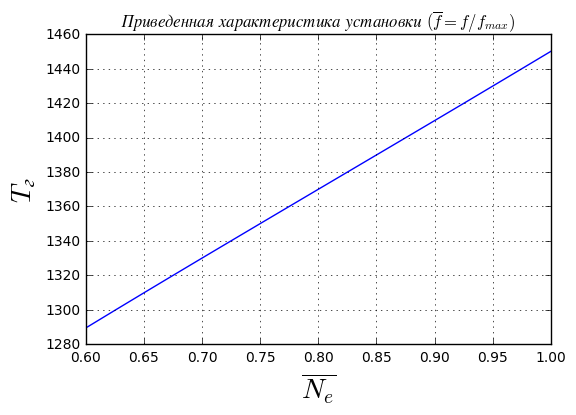

In [193]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()